In [15]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image


In [16]:

# Define paths
base_path = "/Users/yashtembhurnikar/Programming/Pccoe Final Year/Parkinson's Detection/drawings/"
categories = ["spiral", "wave"]
subcategories = ["training", "testing"]
labels = ["healthy", "parkinson"]


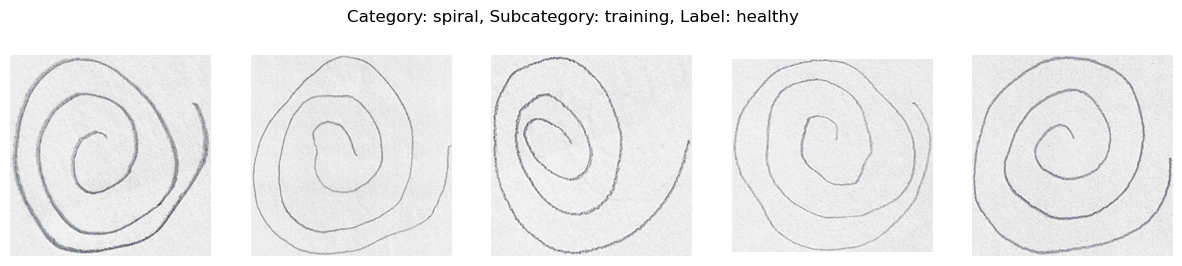

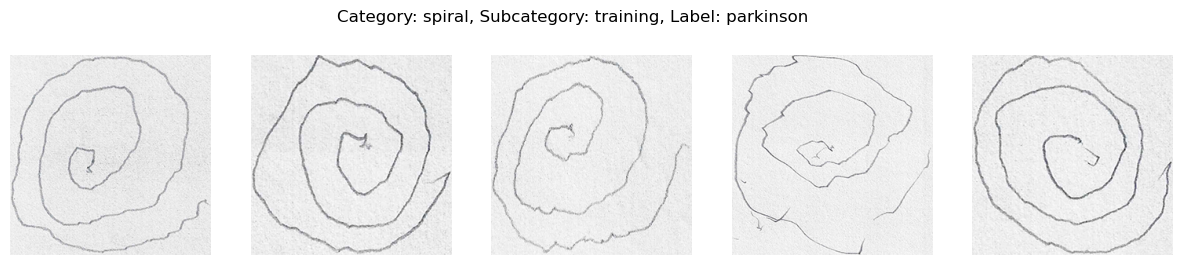

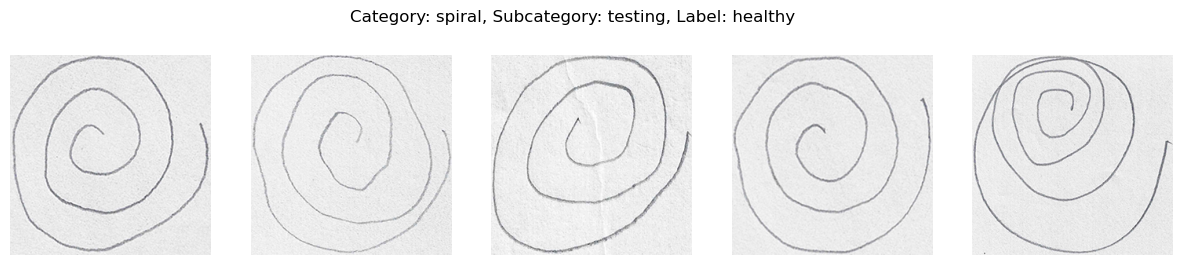

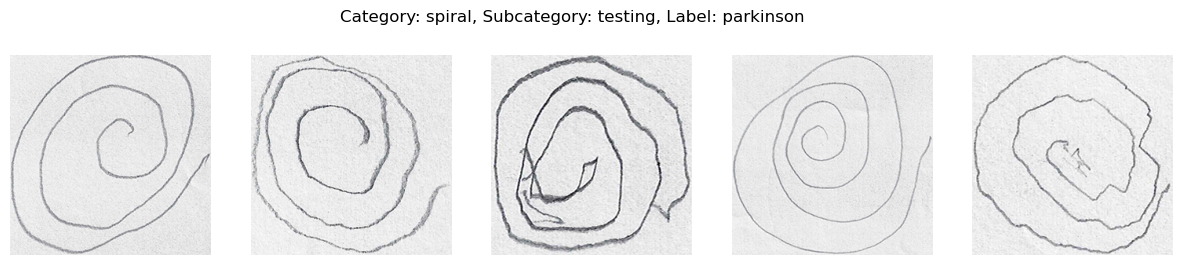

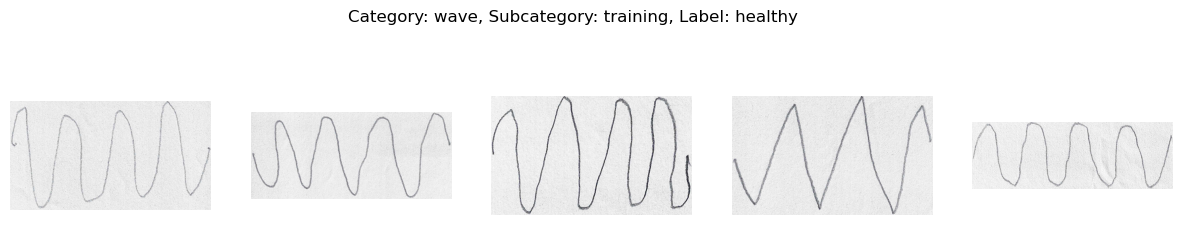

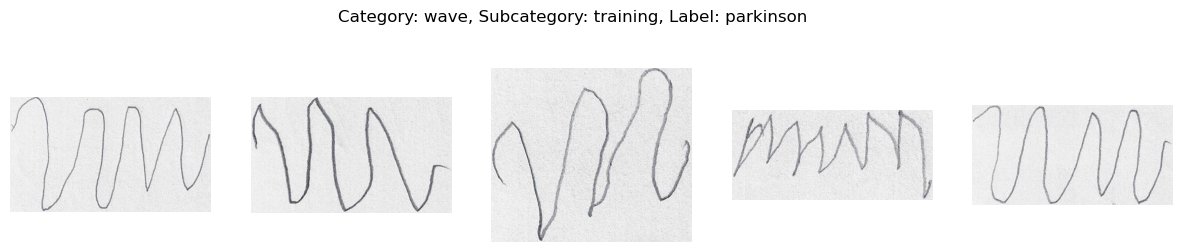

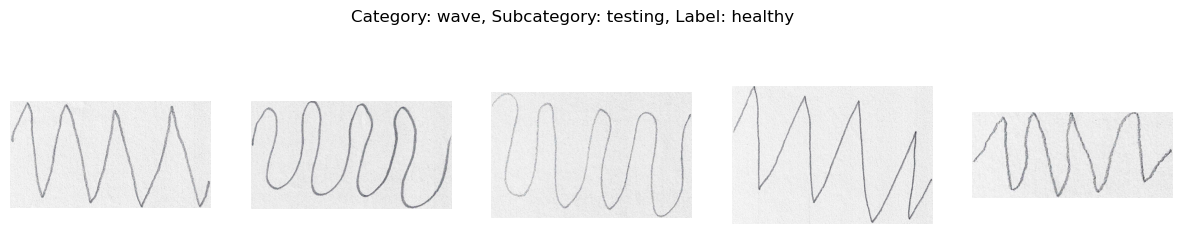

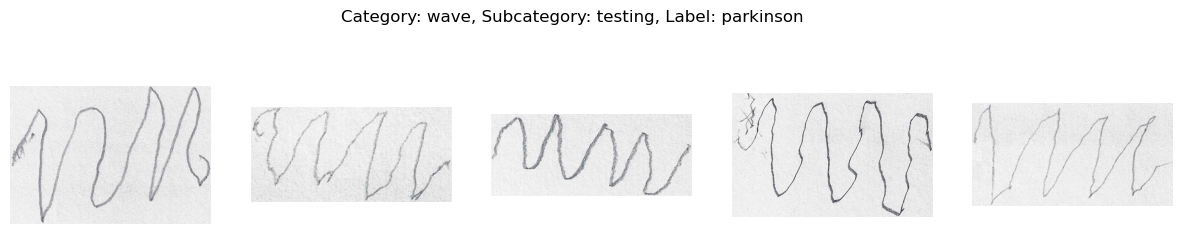

In [17]:

# Function to load images and display statistics
def load_and_display_images(category, subcategory, label, sample_size=5):
    folder_path = os.path.join(base_path, category, subcategory, label)
    image_files = os.listdir(folder_path)
    sample_images = np.random.choice(image_files, sample_size, replace=False)

    fig, axes = plt.subplots(1, sample_size, figsize=(15, 3))
    for i, image_file in enumerate(sample_images):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.suptitle(f"Category: {category}, Subcategory: {subcategory}, Label: {label}")
    plt.show()

# Load and display sample images
for category in categories:
    for subcategory in subcategories:
        for label in labels:
            load_and_display_images(category, subcategory, label)


In [18]:

# Function to display dataset statistics
def display_dataset_statistics():
    statistics = []
    for category in categories:
        for subcategory in subcategories:
            for label in labels:
                folder_path = os.path.join(base_path, category, subcategory, label)
                num_images = len(os.listdir(folder_path))
                statistics.append({
                    "Category": category,
                    "Subcategory": subcategory,
                    "Label": label,
                    "Num_Images": num_images
                })
    df = pd.DataFrame(statistics)
    print("Dataset Statistics:")
    print(df)

# Display dataset statistics
display_dataset_statistics()


Dataset Statistics:
  Category Subcategory      Label  Num_Images
0   spiral    training    healthy          36
1   spiral    training  parkinson          36
2   spiral     testing    healthy          15
3   spiral     testing  parkinson          15
4     wave    training    healthy          36
5     wave    training  parkinson          36
6     wave     testing    healthy          14
7     wave     testing  parkinson          14


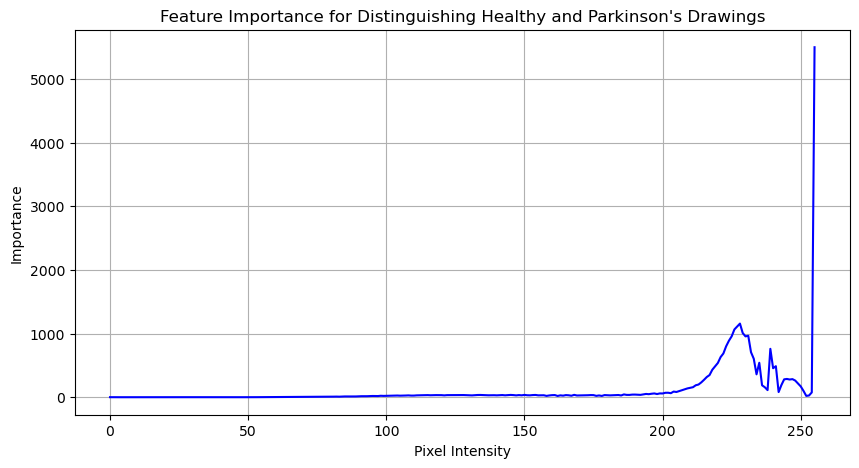

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
base_path = "/Users/yashtembhurnikar/Programming/Pccoe Final Year/Parkinson's Detection/drawings/"
categories = ["spiral", "wave"]
subcategories = ["training", "testing"]
labels = ["healthy", "parkinson"]

# Function to calculate pixel intensity histogram
def calculate_pixel_intensity_histogram(image_path):
    image = Image.open(image_path)
    pixel_values = np.array(image).flatten()
    histogram, _ = np.histogram(pixel_values, bins=256, range=(0, 256))
    return histogram

# Initialize empty arrays to store histograms and labels
histograms = []
y_labels = []

# Load images and calculate histograms
for category in categories:
    for subcategory in subcategories:
        for label in labels:
            folder_path = os.path.join(base_path, category, subcategory, label)
            image_files = os.listdir(folder_path)
            for image_file in image_files:
                image_path = os.path.join(folder_path, image_file)
                histogram = calculate_pixel_intensity_histogram(image_path)
                histograms.append(histogram)
                y_labels.append(label)

# Convert lists to numpy arrays
X = np.array(histograms)
y = np.array(y_labels)

# Calculate feature importance
healthy_samples = X[y == 'healthy']
parkinson_samples = X[y == 'parkinson']
healthy_mean = np.mean(healthy_samples, axis=0)
parkinson_mean = np.mean(parkinson_samples, axis=0)
feature_importance = np.abs(healthy_mean - parkinson_mean)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.plot(feature_importance, color='blue')
plt.title('Feature Importance for Distinguishing Healthy and Parkinson\'s Drawings')
plt.xlabel('Pixel Intensity')
plt.ylabel('Importance')
plt.grid(True)
plt.show()


Accuracy: 0.5609756097560976


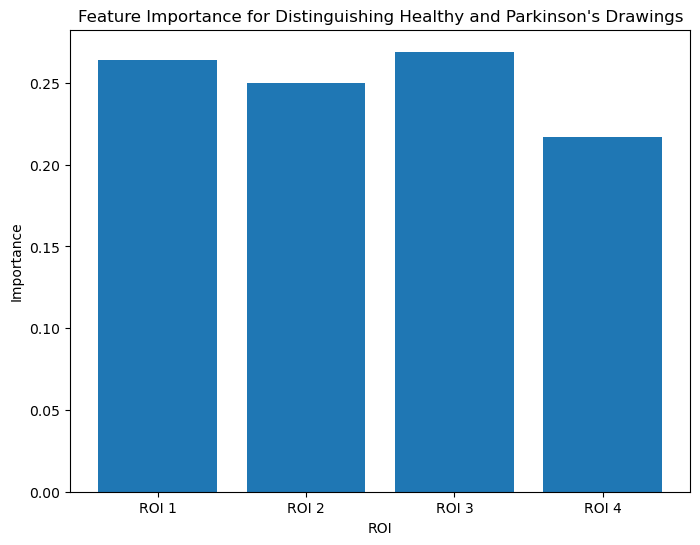

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define paths
base_path = "/Users/yashtembhurnikar/Programming/Pccoe Final Year/Parkinson's Detection/drawings/"
categories = ["spiral", "wave"]
subcategories = ["training", "testing"]
labels = ["healthy", "parkinson"]

# Function to extract ROI features
def extract_roi_features(image_path):
    img = io.imread(image_path)
    if img.ndim == 3 and img.shape[2] == 4:  # Check if the image has 4 channels (RGBA)
        img = img[:, :, :3]  # Drop the alpha channel
    gray_img = np.mean(img, axis=2)  # Convert to grayscale by averaging across channels
    # Define ROIs (you can customize these regions based on your dataset)
    roi1 = gray_img[:100, :100]
    roi2 = gray_img[-100:, -100:]
    roi3 = gray_img[:100, -100:]
    roi4 = gray_img[-100:, :100]
    # Calculate features for each ROI (you can use different features as needed)
    feature1 = np.mean(roi1)
    feature2 = np.mean(roi2)
    feature3 = np.mean(roi3)
    feature4 = np.mean(roi4)
    return [feature1, feature2, feature3, feature4]


# Initialize empty arrays to store features and labels
X = []
y = []

# Load images and extract features
for category in categories:
    for subcategory in subcategories:
        for label in labels:
            folder_path = os.path.join(base_path, category, subcategory, label)
            image_files = os.listdir(folder_path)
            for image_file in image_files:
                image_path = os.path.join(folder_path, image_file)
                features = extract_roi_features(image_path)
                X.append(features)
                y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot feature importance
importances = clf.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances, tick_label=['ROI 1', 'ROI 2', 'ROI 3', 'ROI 4'])
plt.title('Feature Importance for Distinguishing Healthy and Parkinson\'s Drawings')
plt.xlabel('ROI')
plt.ylabel('Importance')
plt.show()
